In [1]:
from inference import run_bayesian_inference

import matplotlib.pyplot as plt

/home/roi/anaconda3/envs/satellite/lib/python3.13/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/roi/anaconda3/envs/satellite/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mcmc = run_bayesian_inference()

--- 1. Generating Ground Truth Data ---
Precomputing ephemeris data...


Data generation complete.

--- 2. Running Bayesian Inference with NumPyro ---


sample: 100%|██████████| 3000/3000 [33:40<00:00,  1.48it/s, 1023 steps of size 1.72e-05. acc. prob=0.83]



--- 3. Inference Results ---


In [3]:
# Get samples from the posterior
mcmc_samples = mcmc.get_samples()
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
    logGam      5.85      0.02      5.85      5.82      5.88      2.91      2.59
     logKd     -7.96      0.00     -7.96     -7.97     -7.96      2.92      2.68
     logKp    -14.51      0.00    -14.51    -14.51    -14.51     17.62      1.03

Number of divergences: 0


In [4]:
mcmc_samples["Kd"].mean(), mcmc_samples["Kd"].std()

(Array(0.00034789, dtype=float64), Array(4.80084636e-07, dtype=float64))

In [5]:
mcmc_samples["Kp"].mean(), mcmc_samples["Kp"].std()

(Array(4.99256566e-07, dtype=float64), Array(8.53841819e-11, dtype=float64))

In [6]:
mcmc_samples["gamma"].mean(), mcmc_samples["gamma"].std()

(Array(347.5375076, dtype=float64), Array(7.08511615, dtype=float64))

In [8]:
import arviz as az

inf_data = az.from_numpyro(mcmc)

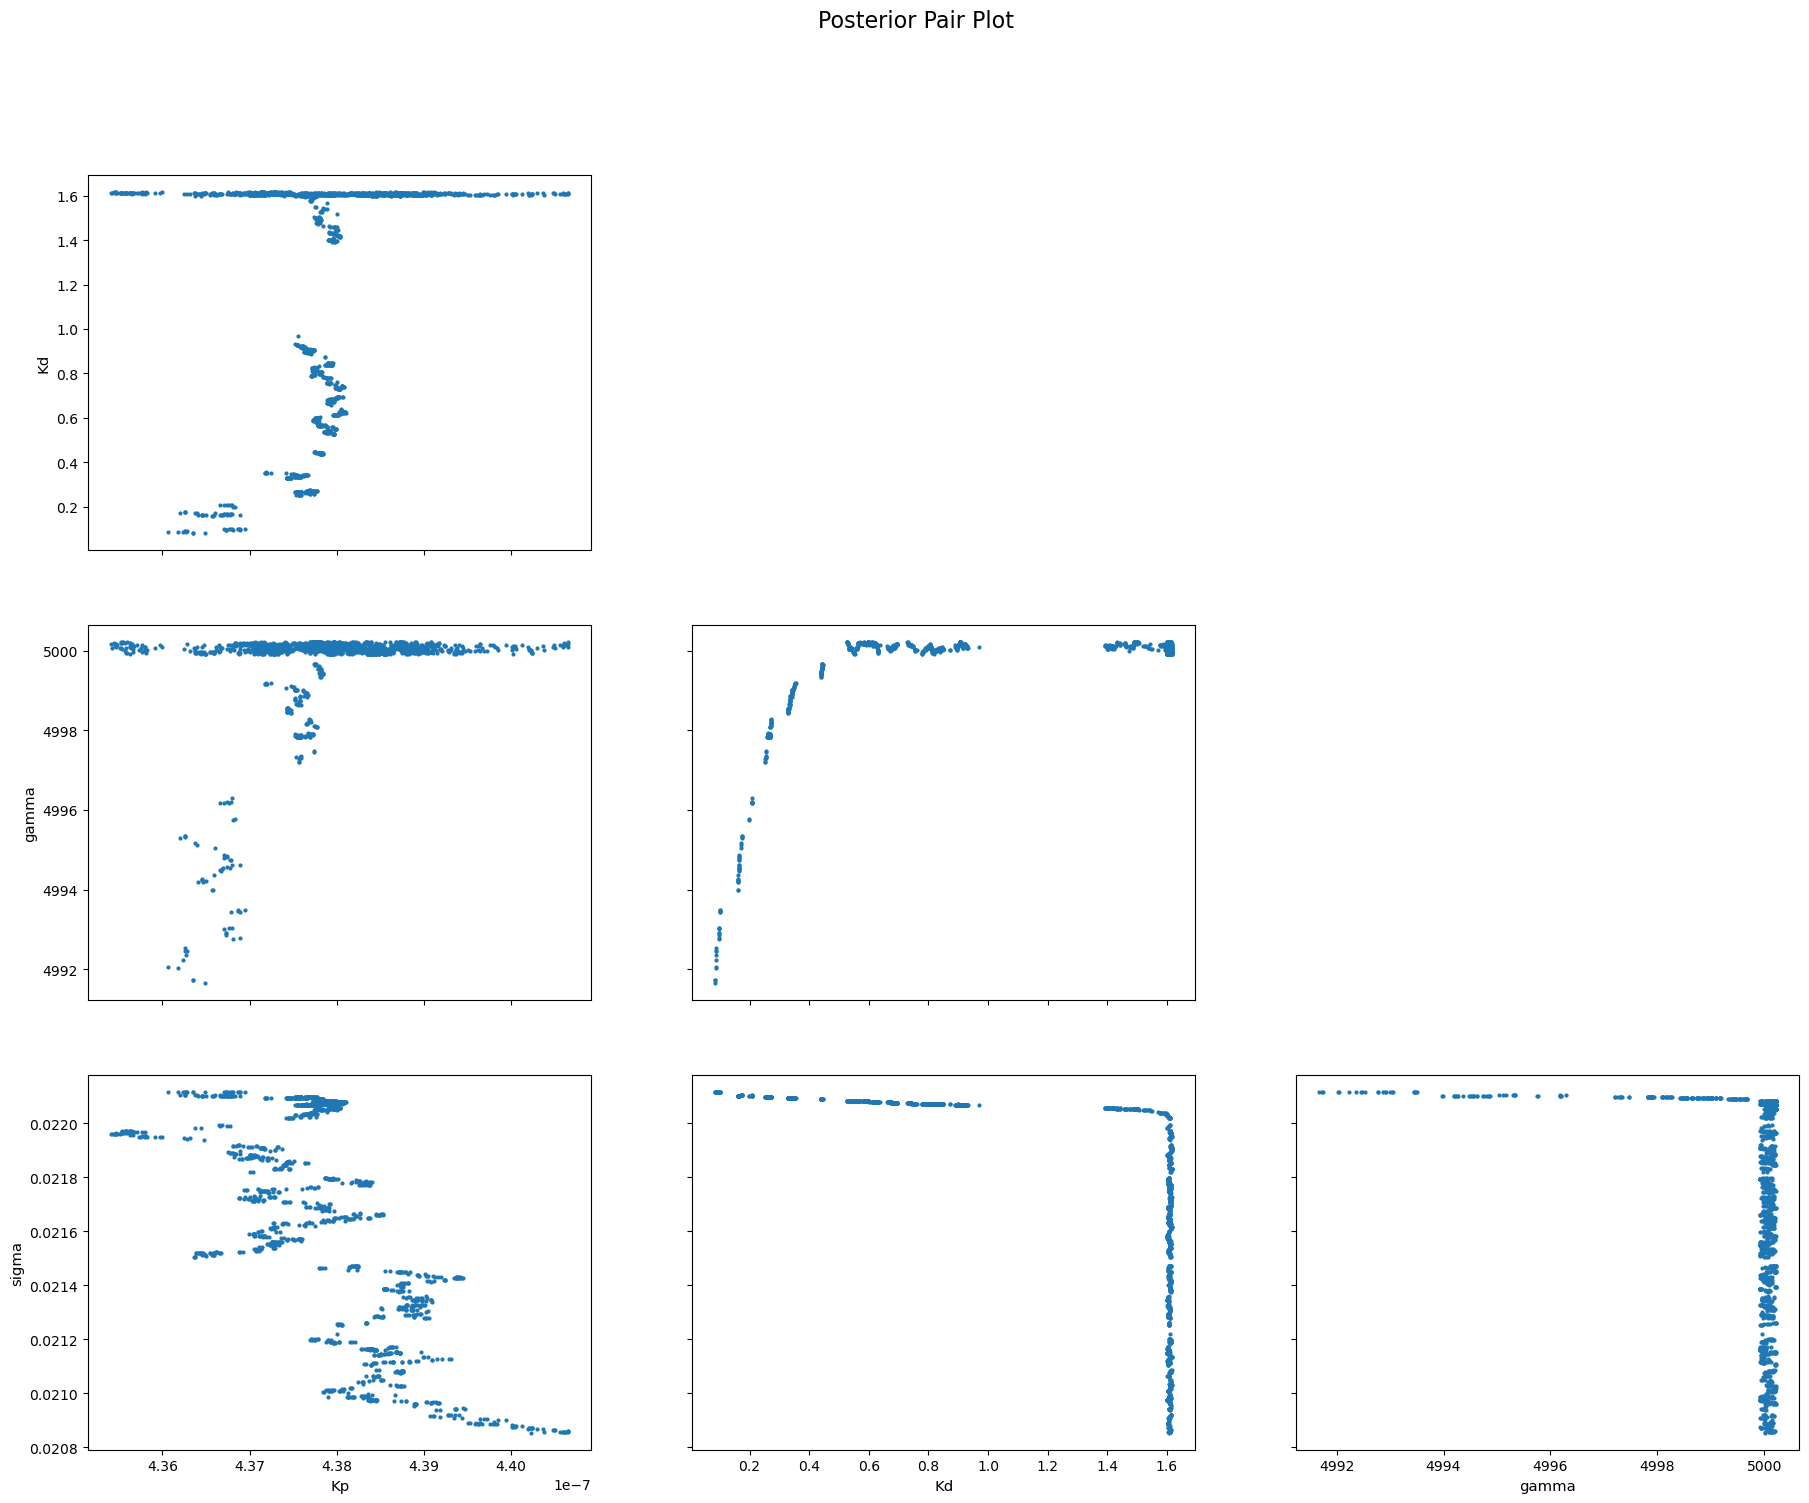

In [11]:
az.plot_pair(
    inf_data,
    var_names=["Kp", "Kd", "gamma", "sigma"],
    kind="scatter",
    divergences=False,
    textsize=10
)
plt.suptitle("Posterior Pair Plot", fontsize=16)
plt.show()
